## Analyzing value and price per sqm and per neighbourhgood

In [26]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, HTML

from utils import get_data

pd.set_option('display.max_columns', None)

In [21]:
def folium_deepnote_show(m):
    data = m.get_root().render()
    data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
    display(HTML(data_fixed_height))

In [8]:
df = get_data()

IQR: 5775 | Actual: 6268 | 92.13%
IQR: 5999 | Actual: 6268 | 95.71%
Total different flats:  (4438, 95)


In [9]:
stat = df.groupby('level7')['value'].agg(['mean', 'count', 'sum']).rename(columns={"sum":"value_sum","mean":"value_mean"})
stat_value = df.groupby('level7')['surface'].agg(['sum','mean']).rename(columns={"sum":"sqm_sum", "mean":"sqm_mean"})
stat_sqm = pd.merge(stat, stat_value, on='level7')
stat_sqm["value_per_sqm"] = stat_sqm["value_sum"] / stat_sqm["sqm_sum"]
stat_sqm.sort_values("value_per_sqm", ascending=False)

value_mean  count  value_sum  sqm_sum    sqm_mean  \
level7                                                                        
Eixample               607107.551383   1012  614392842   108604  107.316206   
Sarrià - Sant Gervasi  779571.394872    390  304032844    57275  146.858974   
Les Corts              620701.990050    201  124761100    23593  117.378109   
Gràcia                 523886.678808    302  158213777    32303  106.963576   
Ciutat Vella           436230.173973    730  318448027    65431   89.631507   
Sant Martí             411969.790170    529  217932019    47274   89.364839   
Sants - Montjuïc       300098.408759    411  123340446    32296   78.579075   
Horta - Guinardó       343868.261128    337  115883604    30486   90.462908   
Sant Andreu            330817.416667    240   79396180    22082   92.008333   
Nou Barris             217458.409091    286   62193105    22686   79.321678   

                       value_per_sqm  
level7                                
Eixample                 5657.184284  
Sarrià - Sant Gervasi    5308.299328  
Les Corts                5288.055779  
Gràcia                   4897.804445  
Ciutat Vella             4866.928933  
Sant Martí               4609.976287  
Sants - Montjuïc         3819.062608  
Horta - Guinardó         3801.207243  
Sant Andreu              3595.515805  
Nou Barris               2741.475139

In [10]:
stat = df.groupby(['level8','level7'])['value'].agg(['mean', 'count', 'sum']).rename(columns={"sum":"value_sum","mean":"value_mean"})
stat_value = df.groupby(['level8','level7'])['surface'].agg(['sum','mean']).rename(columns={"sum":"sqm_sum", "mean":"sqm_mean"})
stat_sqm = pd.merge(stat, stat_value, on=['level8','level7'])
stat_sqm["value_per_sqm"] = stat_sqm["value_sum"] / stat_sqm["sqm_sum"]
stat_sqm.sort_values("value_per_sqm", ascending=False).head(5)


value_mean  \
level8                                       level7                                 
Diagonal Mar i el Front Marítim del Poblenou Sant Martí             677329.268293   
Sarrià                                       Sarrià - Sant Gervasi  758714.285714   
La Clota                                     Horta - Guinardó       483166.666667   
Dreta de l'Eixample                          Eixample               781406.137184   
Pedralbes                                    Les Corts              919185.185185   

                                                                    count  \
level8                                       level7                         
Diagonal Mar i el Front Marítim del Poblenou Sant Martí                82   
Sarrià                                       Sarrià - Sant Gervasi     35   
La Clota                                     Horta - Guinardó           6   
Dreta de l'Eixample                          Eixample                 277   
Pedralbes                                    Les Corts                 54   

                                                                    value_sum  \
level8                                       level7                             
Diagonal Mar i el Front Marítim del Poblenou Sant Martí              55541000   
Sarrià                                       Sarrià - Sant Gervasi   26555000   
La Clota                                     Horta - Guinardó         2899000   
Dreta de l'Eixample                          Eixample               216449500   
Pedralbes                                    Les Corts               49636000   

                                                                    sqm_sum  \
level8                                       level7                           
Diagonal Mar i el Front Marítim del Poblenou Sant Martí                8137   
Sarrià                                       Sarrià - Sant Gervasi     3988   
La Clota                                     Horta - Guinardó           447   
Dreta de l'Eixample                          Eixample                 33383   
Pedralbes                                    Les Corts                 8059   

                                                                      sqm_mean  \
level8                                       level7                              
Diagonal Mar i el Front Marítim del Poblenou Sant Martí              99.231707   
Sarrià                                       Sarrià - Sant Gervasi  113.942857   
La Clota                                     Horta - Guinardó        74.500000   
Dreta de l'Eixample                          Eixample               120.516245   
Pedralbes                                    Les Corts              149.240741   

                                                                    value_per_sqm  
level8                                       level7                                
Diagonal Mar i el Front Marítim del Poblenou Sant Martí               6825.734300  
Sarrià                                       Sarrià - Sant Gervasi    6658.726179  
La Clota                                     Horta - Guinardó         6485.458613  
Dreta de l'Eixample                          Eixample                 6483.824102  
Pedralbes                                    Les Corts                6159.076809

In [11]:
# Calculating the deviation from general mean
value_general_mean = np.mean(df.value)
surface_general_mean = np.mean(df.surface)
stat_sqm["dev_value_general"] = stat_sqm["value_mean"] / value_general_mean
stat_sqm["dev_surface_general"] = stat_sqm["sqm_mean"] / surface_general_mean
stat_sqm["diff_ratios_unfairness"] = stat_sqm["dev_value_general"] / stat_sqm["dev_surface_general"]
stat_sqm = stat_sqm.sort_values("diff_ratios_unfairness", ascending=False)
stat_sqm[["value_mean","sqm_mean","value_per_sqm","dev_value_general","dev_surface_general", "diff_ratios_unfairness"]].head()


value_mean  \
level8                                       level7                                 
Diagonal Mar i el Front Marítim del Poblenou Sant Martí             677329.268293   
Sarrià                                       Sarrià - Sant Gervasi  758714.285714   
La Clota                                     Horta - Guinardó       483166.666667   
Dreta de l'Eixample                          Eixample               781406.137184   
Pedralbes                                    Les Corts              919185.185185   

                                                                      sqm_mean  \
level8                                       level7                              
Diagonal Mar i el Front Marítim del Poblenou Sant Martí              99.231707   
Sarrià                                       Sarrià - Sant Gervasi  113.942857   
La Clota                                     Horta - Guinardó        74.500000   
Dreta de l'Eixample                          Eixample               120.516245   
Pedralbes                                    Les Corts              149.240741   

                                                                    value_per_sqm  \
level8                                       level7                                 
Diagonal Mar i el Front Marítim del Poblenou Sant Martí               6825.734300   
Sarrià                                       Sarrià - Sant Gervasi    6658.726179   
La Clota                                     Horta - Guinardó         6485.458613   
Dreta de l'Eixample                          Eixample                 6483.824102   
Pedralbes                                    Les Corts                6159.076809   

                                                                    dev_value_general  \
level8                                       level7                                     
Diagonal Mar i el Front Marítim del Poblenou Sant Martí                      1.418860   
Sarrià                                       Sarrià - Sant Gervasi           1.589344   
La Clota                                     Horta - Guinardó                1.012131   
Dreta de l'Eixample                          Eixample                        1.636878   
Pedralbes                                    Les Corts                       1.925496   

                                                                    dev_surface_general  \
level8                                       level7                                       
Diagonal Mar i el Front Marítim del Poblenou Sant Martí                        0.996291   
Sarrià                                       Sarrià - Sant Gervasi             1.143991   
La Clota                                     Horta - Guinardó                  0.747983   
Dreta de l'Eixample                          Eixample                          1.209988   
Pedralbes                                    Les Corts                         1.498383   

                                                                    diff_ratios_unfairness  
level8                                       level7                                         
Diagonal Mar i el Front Marítim del Poblenou Sant Martí                           1.424142  
Sarrià                                       Sarrià - Sant Gervasi                1.389297  
La Clota                                     Horta - Guinardó                     1.353146  
Dreta de l'Eixample                          Eixample                             1.352805  
Pedralbes                                    Les Corts                            1.285049

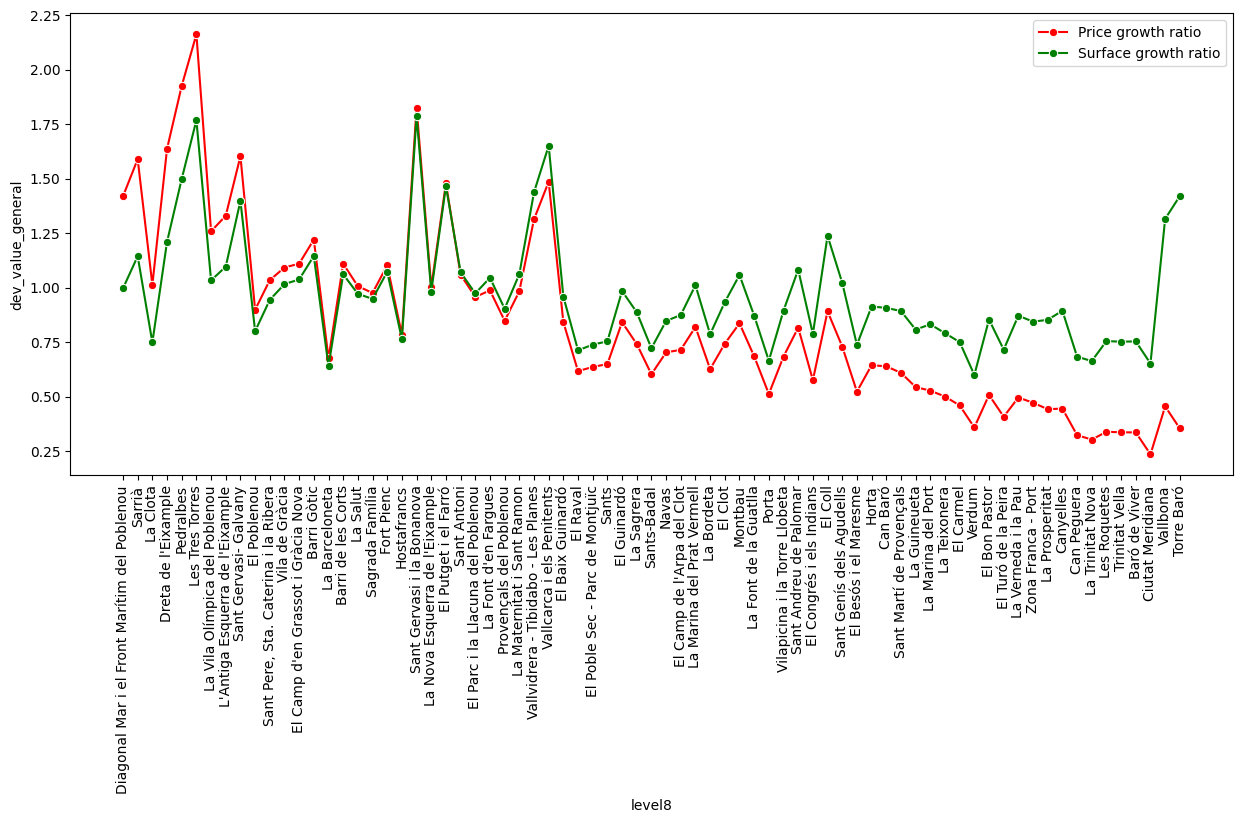

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=stat_sqm, x="level8", y="dev_value_general", marker='o', label="Price growth ratio", color="red")
sns.lineplot(data=stat_sqm, x="level8", y="dev_surface_general", marker='o', label="Surface growth ratio", color="green")
plt.legend()
plt.xticks(rotation=90)
plt.show()

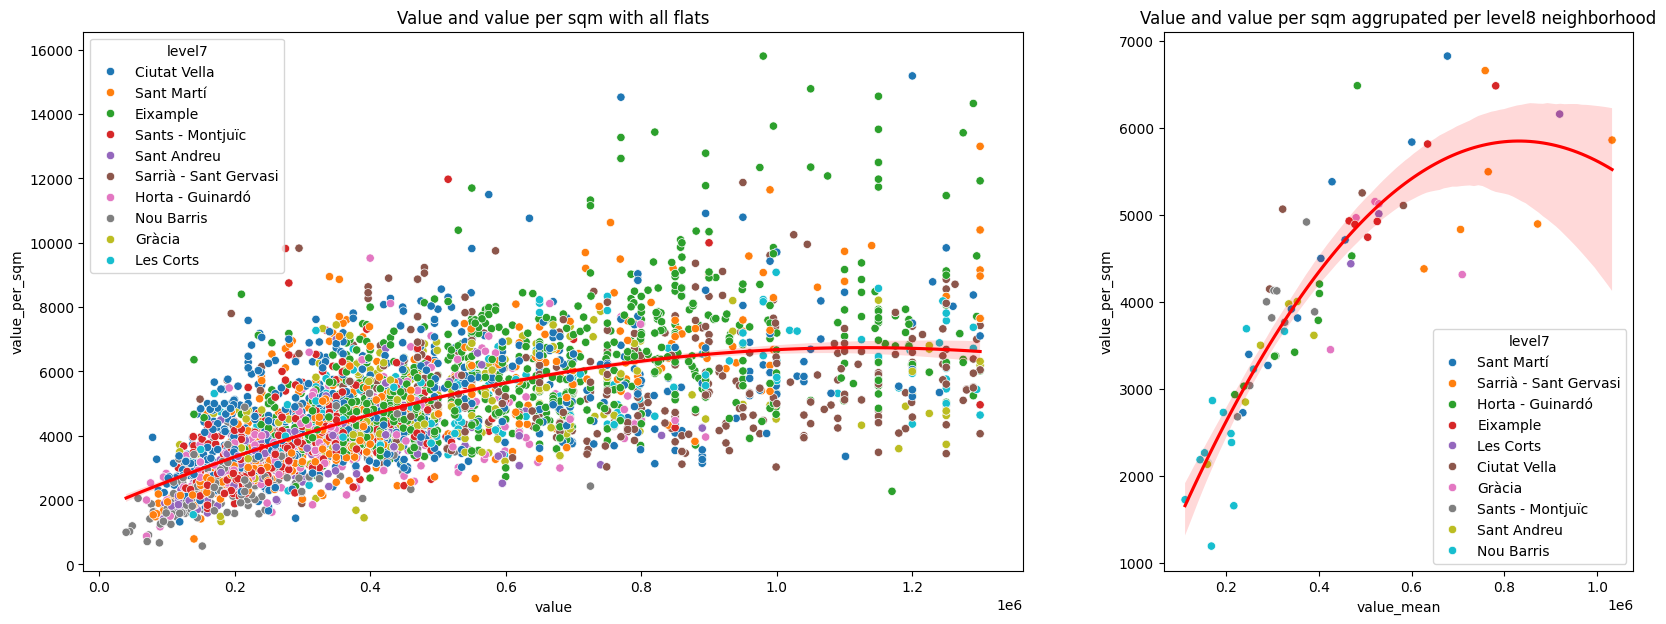

In [13]:
df["value_per_sqm"] = df["value"] / df["surface"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), gridspec_kw={'width_ratios': [2, 1]})
sns.scatterplot(data=df, x="value", y="value_per_sqm", hue="level7", ax=ax[0])
sns.regplot(data=df, x='value', y='value_per_sqm', scatter=False, color='red', order=2, label='Trendline', ax=ax[0])
ax[0].set_title("Value and value per sqm with all flats")

sns.scatterplot(data=stat_sqm, x="value_mean", y="value_per_sqm", hue="level7", ax=ax[1])
sns.regplot(data=stat_sqm, x='value_mean', y='value_per_sqm', scatter=False, color='red', order=2, label='Trendline', ax=ax[1])
ax[1].set_title("Value and value per sqm aggrupated per level8 neighborhood")
plt.show()

In [14]:
def get_color(value, min_val, max_val):
    # Normalize the value
    normalized = (value - min_val) / (max_val - min_val)
    # normalized = (np.log(value) - np.log(min_val)) / (np.log(max_val) - np.log(min_val))
    # Calculate RGB values
    r = int(255 * (1 - normalized))
    g = int(255 * normalized)
    b = 0
    # Convert to hexadecimal format
    color = '#{:02x}{:02x}{:02x}'.format(r, g, b)
    return color

In [27]:
import folium

# Find the min and max values of 'value' in your DataFrame
min_value = df['value'].min()
max_value = df['value'].max()

# Create a map centered around Barcelona
m = folium.Map(location=[41.3851, 2.1734], zoom_start=13, tiles='cartodbpositron')

# Add CircleMarkers for each location with color based on NumericalFeature
for index, row in df.iterrows():
    fill_color = get_color(row['value'], max_value, min_value)
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,  # Adjust the radius of the circle marker
        popup=row['value'],
        fill=True,
        fill_color=fill_color,
        color=None,
        fill_opacity=0.7
    ).add_to(m)

folium_deepnote_show(m)

In [16]:
import requests
import ast
import geopandas as gpd

url = "https://opendata-ajuntament.barcelona.cat/data/api/action/datastore_search?resource_id=b21fa550-56ea-4f4c-9adc-b8009381896e"
response = requests.get(url)
data = response.json()
records = data["result"]["records"]
hoods = pd.DataFrame(records)
hoods['geometry'] = gpd.GeoSeries.from_wkt(hoods['geometria_wgs84'])
my_geo_df = gpd.GeoDataFrame(hoods, geometry='geometry')


In [17]:
from fuzzywuzzy import process

def merge_geodf_with_data(geo_df, column_geodf, data, column_data):
    unique_values_df1 = geo_df[column_geodf].unique()
    unique_values_df2 = data[column_data].unique()

    matches = {}
    for value in unique_values_df1:
        matches[value] = process.extractOne(value, unique_values_df2)[0] #find_most_similar(value, unique_values_df2)
    
    matches_df = pd.DataFrame(matches.items(), columns=[column_geodf, column_data])
    
    my_geo_df_names = pd.merge(geo_df, matches_df, on=column_geodf)
    merged = pd.merge(my_geo_df_names, data, on=column_data)

    return merged

value_hood = merge_geodf_with_data(my_geo_df, "nom_barri", stat_sqm.reset_index()[["level8","value_mean"]], "level8")
value_per_sqm_hood = merge_geodf_with_data(my_geo_df, "nom_barri", stat_sqm.reset_index()[["level8","value_per_sqm","diff_ratios_unfairness"]], "level8")


In [18]:
import folium
import branca.colormap as cm

min_value = value_hood['value_mean'].min()
max_value = value_hood['value_mean'].max()

m = folium.Map([41.3851, 2.1734], zoom_start=12, tiles="cartodbpositron")
colormap = cm.LinearColormap(['green', 'yellow', 'red'], vmin=min_value, vmax=max_value)


for index, row in value_hood.iterrows():
    color = colormap(row["value_mean"])
    polygon = folium.GeoJson(row["geometry"],
                              style_function=lambda x, color=color: {'fillColor': color, 'color': color, 'weight': 1, 'fillOpacity': 0.7})
    polygon.add_child(folium.Popup(row["level8"]))

    m.add_child(polygon)
colormap.caption = 'Average Value'
m.add_child(colormap)

In [19]:
min_value = value_per_sqm_hood['value_per_sqm'].min()
max_value = value_per_sqm_hood['value_per_sqm'].max()

m = folium.Map([41.3851, 2.1734], zoom_start=12, tiles="cartodbpositron")
colormap = cm.LinearColormap(['green', 'yellow', 'red'], vmin=min_value, vmax=max_value)


for index, row in value_per_sqm_hood.iterrows():
    color = colormap(row["value_per_sqm"])
    polygon = folium.GeoJson(row["geometry"],
                              style_function=lambda x, color=color: {'fillColor': color, 'color': color, 'weight': 1, 'fillOpacity': 0.7})
    polygon.add_child(folium.Popup(row["level8"]))

    m.add_child(polygon)
colormap.caption = 'Value per sqm'
m.add_child(colormap)

In [20]:
min_value = value_per_sqm_hood['diff_ratios_unfairness'].min()
max_value = value_per_sqm_hood['diff_ratios_unfairness'].max()

m = folium.Map([41.3851, 2.1734], zoom_start=12, tiles="cartodbpositron")
colormap = cm.LinearColormap(['green', 'yellow', 'red'], vmin=min_value, vmax=max_value)


for index, row in value_per_sqm_hood.iterrows():
    color = colormap(row["diff_ratios_unfairness"])
    polygon = folium.GeoJson(row["geometry"],
                              style_function=lambda x, color=color: {'fillColor': color, 'color': color, 'weight': 1, 'fillOpacity': 0.7})
    polygon.add_child(folium.Popup(row["level8"]))

    m.add_child(polygon)
colormap.caption = 'Unfairness'
m.add_child(colormap)
